<a href="https://colab.research.google.com/github/abhijit-exe/abhijit-exe/blob/main/Data_Analyst_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing necessary libraries

In [ ]:
!pip install pandas matplotlib seaborn openpyxl PyMuPDF python-docx pillow together

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 9.0 MB/s eta 0:00:00


Integrating Llama 4 maverick api for question answers

In [ ]:
import requests
def query_llama(prompt, api_key):
    url = "https://api.together.xyz/v1/chat/completions"
    headers = {
        "Authorization": f"Bearer {api_key}",
        "Content-Type": "application/json"
    }
    payload = {
        "model": "meta-llama/Llama-4-Maverick-17B-128E-Instruct-FP8",
        "messages": [
            {"role": "system", "content": "You are a helpful data analyst."},
            {"role": "user", "content": prompt}
        ]
    }
    response = requests.post(url, headers=headers, json=payload)
    return response.json()['choices'][0]['message']['content']

In [ ]:
import pandas as pd
import fitz
import docx
from PIL import Image
!pip install pytesseract
import pytesseract

Extract data depending on the file

In [ ]:
def extract_text_or_data(file_path):
    if file_path.endswith(".csv"):
        return pd.read_csv(file_path)
    elif file_path.endswith(".xlsx"):
        return pd.read_excel(file_path)
    elif file_path.endswith(".txt"):
        with open(file_path, 'r') as file:
            return file.read()
    elif file_path.endswith(".docx"):
        doc = docx.Document(file_path)
        return "\n".join([para.text for para in doc.paragraphs])
    elif file_path.endswith(".pdf"):
        doc = fitz.open(file_path)
        return "\n".join([page.get_text() for page in doc])
    elif file_path.endswith((".png", ".jpg", ".jpeg")):
        text = pytesseract.image_to_string(Image.open(file_path))
        return text
    else:
        raise ValueError("Unsupported file type")

Simple Data analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def basic_eda(df):
    print("\n--- Shape ---\n", df.shape)
    print("\n--- Columns ---\n", df.columns)
    print("\n--- Info ---")
    print(df.info())
    print("\n--- Describe ---\n", df.describe())
    print("\n--- Missing Values ---\n", df.isnull().sum())

def plot_visualizations(df):
    for col in df.select_dtypes(include='number').columns:
        plt.figure(figsize=(6,4))
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()

    if len(df.select_dtypes(include='object').columns) > 0:
        for col in df.select_dtypes(include='object').columns[:1]:
            plt.figure(figsize=(6,4))
            df[col].value_counts().plot(kind='bar')
            plt.title(f"Value Counts of {col}")
            plt.show()

In [ ]:
def data_analyst_agent(file_path, api_key):
    data = extract_text_or_data(file_path)
    if isinstance(data, pd.DataFrame):
        print("Structured Data Detected\n")
        basic_eda(data)
        plot_visualizations(data)

        while True:
            question = input("Ask a question (or type 'exit'): ")
            if question.lower() == 'exit':
                break
            prompt = f"Answer this question based on the following data:\n{data.head(10).to_string()}\n\nQuestion: {question}"
            answer = query_llama(prompt, api_key)
            print("\nAnswer:", answer)
    else:
        print("Text/Unstructured File Detected\n")
        print(data[:500])
        while True:
            question = input("Ask a question (or type 'exit'): ")
            if question.lower() == 'exit':
                break
            prompt = f"Based on the following text:\n{data[:1000]}\n\nAnswer this: {question}"
            answer = query_llama(prompt, api_key)
            print("\nAnswer:", answer)


Testing on Sample File

Structured Data Detected


--- Shape ---
 (5000, 7)

--- Columns ---
 Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
None

--- Describe ---
        Avg. Area Inco

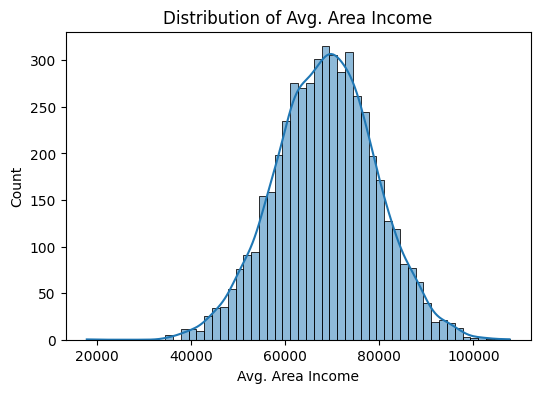

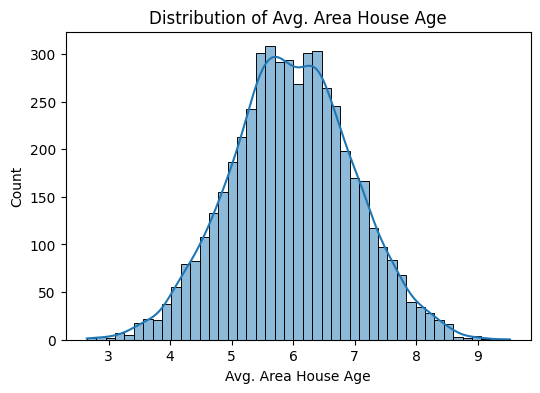

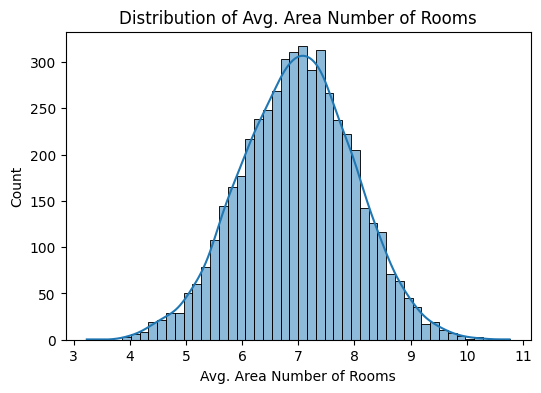

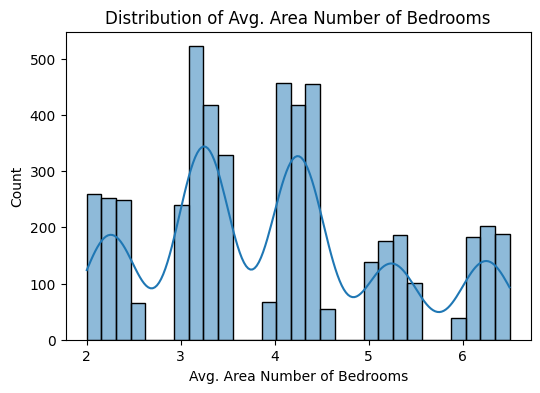

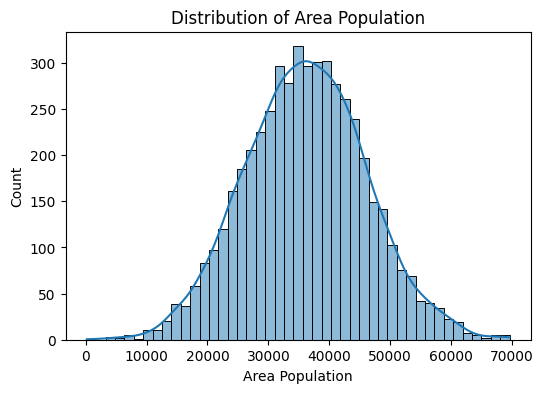

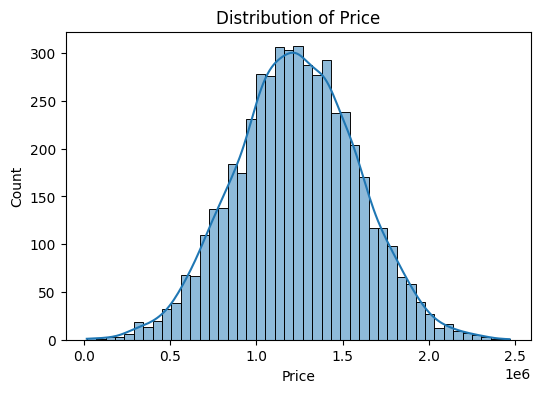

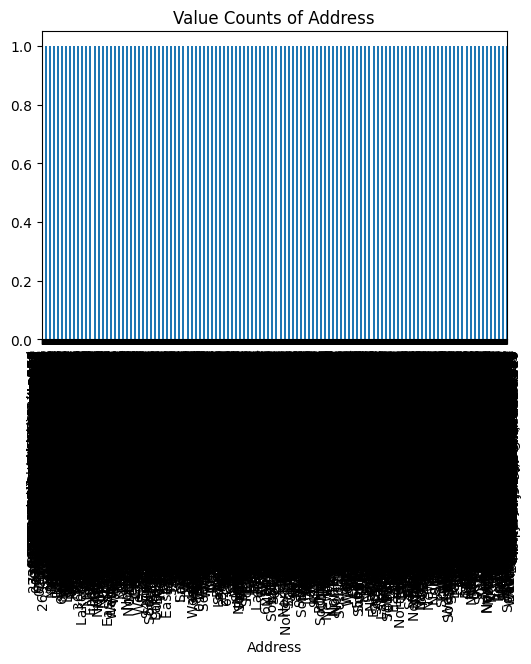

Ask a question (or type 'exit'): what is the median price?

Answer: To determine the median price, we need to first extract the price column from the given data and then arrange the prices in ascending order. The prices are as follows:

1. 1.059034e+06 = 1,059,034
2. 1.505891e+06 = 1,505,891
3. 1.058988e+06 = 1,058,988
4. 1.260617e+06 = 1,260,617
5. 6.309435e+05 = 630,943.5
6. 1.068138e+06 = 1,068,138
7. 1.502056e+06 = 1,502,056
8. 1.573937e+06 = 1,573,937
9. 7.988695e+05 = 798,869.5
10. 1.545155e+06 = 1,545,155

Arranging these prices in ascending order:

1. 630,943.5
2. 798,869.5
3. 1,058,988
4. 1,059,034
5. 1,068,138
6. 1,260,617
7. 1,502,056
8. 1,505,891
9. 1,545,155
10. 1,573,937

Since there are 10 numbers (an even amount), the median is the average of the 5th and 6th numbers.

Median = (1,068,138 + 1,260,617) / 2

Median = 2,328,755 / 2

Median = 1,164,377.5

Therefore, the median price is 1,164,377.5.
Ask a question (or type 'exit'): exit


In [ ]:
file_path = "/content/sample_data/USA_Housing - USA_Housing.csv"
api_key = "37e6bf0b195a874b51a0eb3dfa05a454df61969242f571987094093a1b88e275"

data_analyst_agent(file_path, api_key)